Q3a:
[[   1 1800]
 [   1 1801]
 [   1 1802]]
Q3b:
[120 155  99]
Q3c:
[[      3    5403]
 [   5403 9730805]]
Q3d:
[[ 1.62180083e+06 -9.00500000e+02]
 [-9.00500000e+02  5.00000000e-01]]
Q3e:
[[ 9.00833333e+02  3.33333333e-01 -9.00166666e+02]
 [-5.00000000e-01  1.13686838e-13  5.00000000e-01]]
Q3f:
[ 1.90351667e+04 -1.05000000e+01]
Q4: -2185.3333322327962
Q5a: <
Q5b: A positive beta_1, or when the sign is >, indicates that the amount of freezing days of the lake each year is generally increasing from 1855 to 2020 according to the linear regression model. If beta_1 is negative, or is <, the model indicates that the amount of freezing days each year is generally decreasing. If it is =, that means the amount is generally similar between years, although slight variations may be present.
Q6a: 1812.8730158727817
Q6b: It is a compelling x*, as early in the data, ice days exceeding 100 are quite common,while in the last twenty or so years, they have occurred less and less, even averaging around 8

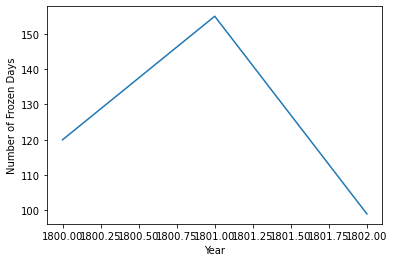

In [14]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import csv

def load_data(filepath):
    csv_list = list()
    with open(filepath, 'r', encoding='UTF-8') as f:
        reader = csv.DictReader(f)
        for row in reader:
            year = int(row['year'])
            days = int(row['days'])
            csv_list.append([year, days])
    csv_list = np.array(csv_list)
    return csv_list

def csvplot(csvlist):
    x = csvlist[:, 0]
    y = csvlist[:, 1]
    plt.plot(x, y)
    plt.xlabel('Year')
    plt.ylabel('Number of Frozen Days')
    plt.savefig("plot.jpg")
    return

def Q3a(csvlist):
    X = list()
    for x in csvlist[:, 0]:
        X.append([1, x])
    X = np.array(X)
    return X

def Q3b(csvlist):
    Y = csvlist[:, 1]
    Y = np.array(Y)
    return Y

def Q3c(X):
    X_T = np.transpose(X)
    Z = np.dot(X_T, X)
    return Z

def Q3d(Z):
    I = np.linalg.inv(Z)
    return I

def Q3e(Z, X):
    Xtrans = np.transpose(X)
    PI = np.dot(Z, Xtrans)
    return PI

def Q3f(PI, Y):
    bhat = np.dot(PI, Y)
    return bhat

def Q4(xtest, betahat):
    ytest = betahat[0] + betahat[1] * xtest
    return ytest

def Q5a(betahat):
    if (betahat[1] > 0):
        return '>'
    elif (betahat[1] < 0):
        return '<'
    else:
        return '='

def Q6a(y, betahat):
    x = (y - betahat[0])/betahat[1]
    return x


if __name__ =="__main__":
    filename = sys.argv[1]
    csvlist = load_data(filename)
    csvplot(csvlist)

    X = Q3a(csvlist)
    print("Q3a:")
    print(X)

    Y = Q3b(csvlist)
    print("Q3b:")
    print(Y)

    Z = Q3c(X)
    print("Q3c:")
    print(Z)

    I = Q3d(Z)
    print("Q3d:")
    print(I)

    PI = Q3e(I, X)
    print("Q3e:")
    print(PI)

    betahat = Q3f(PI, Y)
    print("Q3f:")
    print(betahat)

    ytest = Q4(2021, betahat)
    print("Q4: " + str(ytest))

    print("Q5a: " + Q5a(betahat))

    print("Q5b: " + "A positive beta_1, or when the sign is >, indicates that the amount of freezing days \
of the lake each year is generally increasing from 1855 to 2020 according to the linear regression model. \
If beta_1 is negative, or is <, the model indicates that the amount of freezing days each year is generally decreasing. If it is =, that means \
the amount is generally similar between years, although slight variations may be present.")

    print("Q6a: ", end="")
    print(Q6a(0, betahat))

    print("Q6b: " + "It is a compelling x*, as early in the data, ice days exceeding \
100 are quite common,while in the last twenty or so years, they have occurred \
less and less, even averaging around 80 or so.Based on that rate of decreasing \
ice days, it would be a very logically compelling timeline that is backed up by \
the linear regression model. For further accuracy, perhaps utilizing other models may increase accuracy of x*.")